In [3]:
from src import utils
import pandas as pd
import seaborn as sns
import numpy as np

In [21]:
def load_data(fname: str, separator: str):
   data = pd.DataFrame(pd.read_csv(fname, sep=separator))
   print(f'Data Shape: {data.shape}')
   return data

In [24]:
data = load_data('../data/processed/car.csv', "\t")

Data Shape: (1728, 8)


In [25]:
data.head()

,index,0,1,2,3,4,5,6
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


In [26]:
data = data.set_index('index')
data.index.name = None

In [29]:
for column in data.columns:
    unique = data[column].unique()
    print(f'{column} has {len(unique)} {unique} unique values')

0 has 4 ['vhigh' 'high' 'med' 'low'] unique values
1 has 4 ['vhigh' 'high' 'med' 'low'] unique values
2 has 4 ['2' '3' '4' '5more'] unique values
3 has 3 ['2' '4' 'more'] unique values
4 has 3 ['small' 'med' 'big'] unique values
5 has 3 ['low' 'med' 'high'] unique values
6 has 4 ['unacc' 'acc' 'vgood' 'good'] unique values


In [30]:
column_name = ['buying','maint','doors','persons','lug_boot','safety','target']

In [34]:
data.columns = column_name
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [35]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

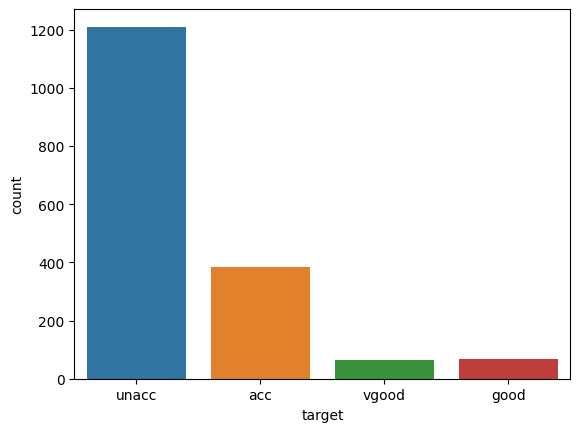

In [36]:
sns.countplot(data=data, x='target', hue='target')

<Axes: xlabel='buying', ylabel='count'>

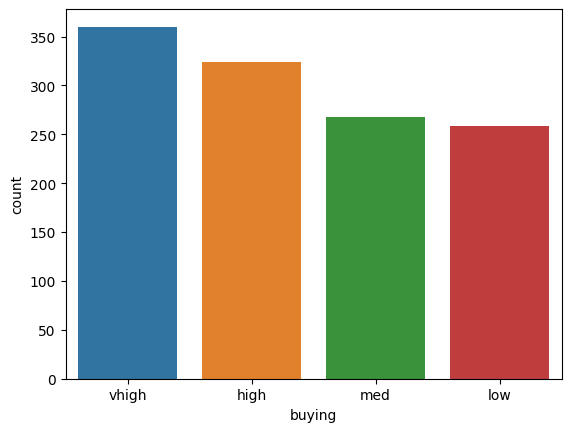

In [38]:
sns.countplot(data=data[data["target"] == "unacc"], x='buying', hue='buying')

<Axes: xlabel='safety', ylabel='count'>

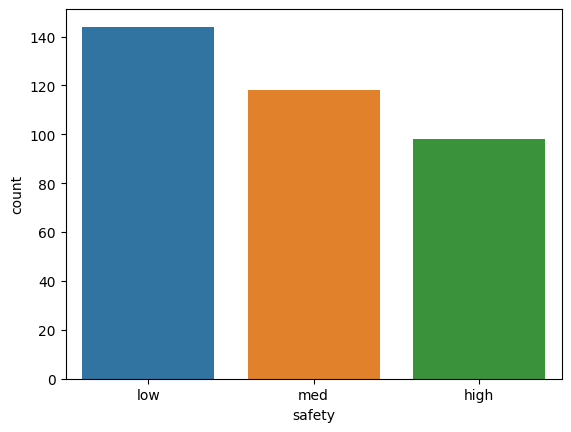

In [40]:
sns.countplot(data=data[(data["target"] == "unacc") & (data["buying"] == "vhigh")], x='safety', hue='safety')

<Axes: xlabel='buying', ylabel='count'>

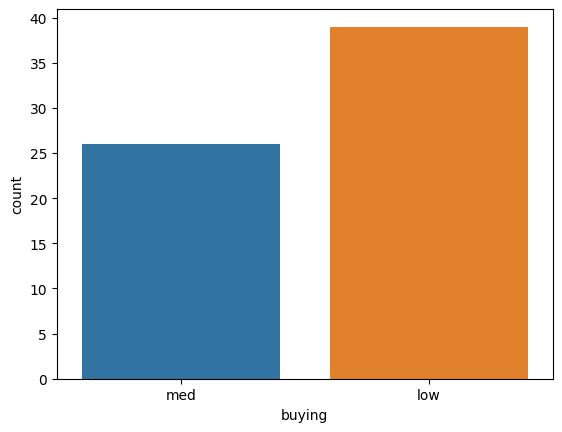

In [47]:
sns.countplot(data=data[(data["target"] == "vgood")], x='buying', hue='buying')

<Axes: xlabel='safety', ylabel='count'>

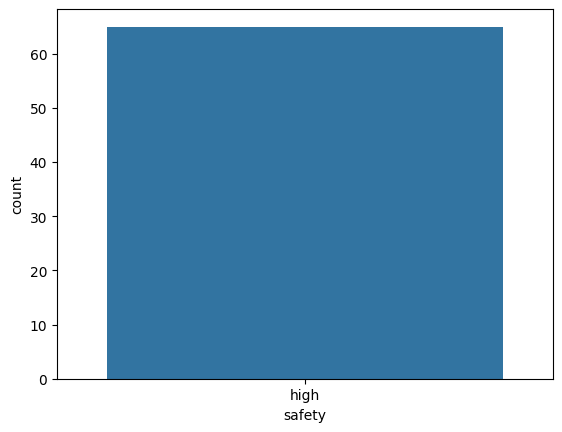

In [48]:
sns.countplot(data=data[(data["target"] == "vgood")], x='safety', hue='safety')

In [3]:
X_TRAIN_PATH = '..data/interim/X_train.pkl'

X_train = utils.deserialize_data(X_TRAIN_PATH)

In [4]:
Y_TRAIN_PATH = '../data/interim/Y_train.pkl'

y_train = utils.deserialize_data(Y_TRAIN_PATH)

In [5]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25,241875,MORTGAGE,4.0,EDUCATION,A,16000,7.05,0.07,N,4
15138,21,18000,RENT,5.0,PERSONAL,B,1500,12.18,0.08,N,4
7474,25,53000,MORTGAGE,10.0,MEDICAL,B,16000,12.53,0.30,N,2
18212,28,16800,OWN,NaN,MEDICAL,C,5000,13.98,0.30,N,8
6493,25,50000,MORTGAGE,2.0,VENTURE,A,10000,7.90,0.20,N,2


In [6]:
num_col = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
cat_col = ['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file']

print(num_col)
print(cat_col)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 15884 to 17068
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25326 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23563 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


Setelah load dan deserialize data, kita identifikasi data berdasarkan tipe datanya, yaitu numerik dan object. Lalu kita simpan nama kolom numerik pada variable num_col, sedangkan object pada variable cat_col.

In [8]:
X_train.shape

(26064, 11)

In [9]:
X_train.duplicated(keep=False)

15884    False
15138    False
7474     False
18212    False
6493     False
         ...  
14621    False
18736    False
1663     False
18257    False
17068    False
Length: 26064, dtype: bool

In [10]:
X_train.sort_values('person_income')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
31930,41,4000,RENT,0.0,MEDICAL,C,2000,13.22,0.50,Y,15
15964,21,4080,RENT,0.0,EDUCATION,B,1400,11.86,0.34,N,4
15963,21,4200,RENT,3.0,PERSONAL,E,2750,16.95,0.65,N,3
27896,32,4200,RENT,NaN,PERSONAL,C,1200,12.73,0.29,N,9
15960,22,4800,RENT,1.0,PERSONAL,D,1800,14.84,0.38,Y,2
...,...,...,...,...,...,...,...,...,...,...,...
29120,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,NaN,0.01,N,16
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.40,0.00,N,15
32497,63,1782000,RENT,13.0,EDUCATION,C,12025,14.27,0.01,N,30
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0.00,Y,15


Pada tahap ini, kita mengecek duplikasi data pada X_Train dengan keep yang hasil pengecekannya False, kemudian X_train diurutkan berdasarkan data person_income. Tindakan selanjutnya kita bisa drop data duplicates dan keep data yang pertama atau yang terakhir

In [11]:
X_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              738
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2501
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Pada tahap ini kita melakukan pengecekan data null untuk setiap kolom. Tahap selanjutnya setelah pengecekan, kita bisa melakukan fill in atau pengisian data dengan data median atau mean, tergantung skewed data. Jika terdistribusi normal, bisa dengan data mean, jika skewed dengan median

In [12]:
X_train_ = X_train[num_col]
X_train_.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
15884,25,241875,4.0,16000,7.05,0.07,4
15138,21,18000,5.0,1500,12.18,0.08,4
7474,25,53000,10.0,16000,12.53,0.30,2
18212,28,16800,NaN,5000,13.98,0.30,8
6493,25,50000,2.0,10000,7.90,0.20,2


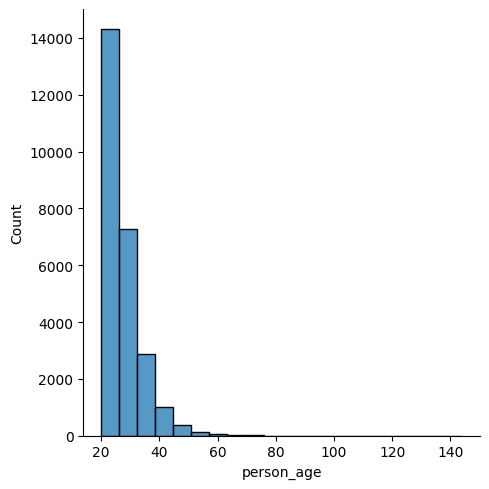

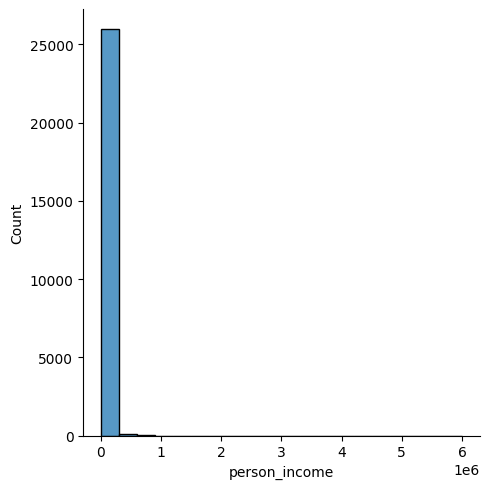

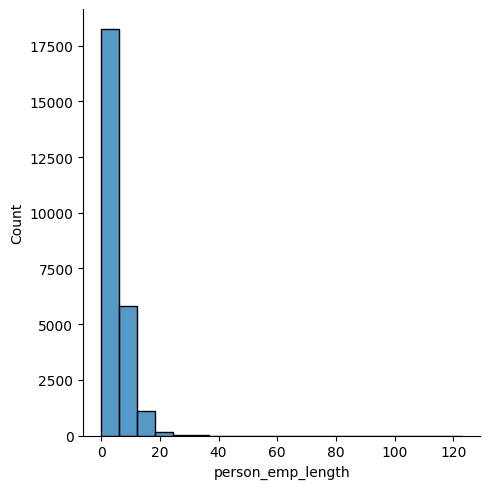

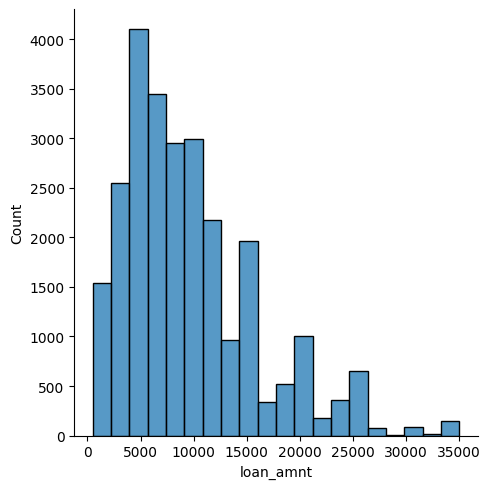

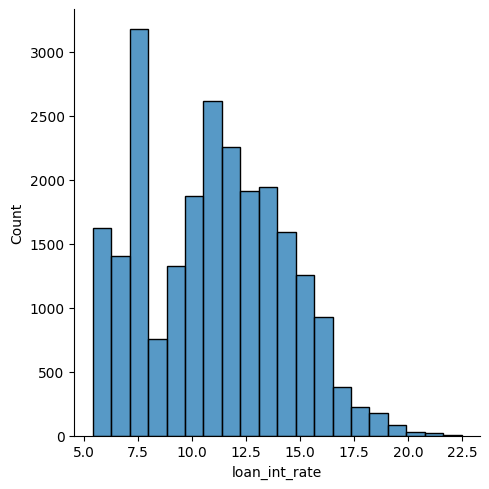

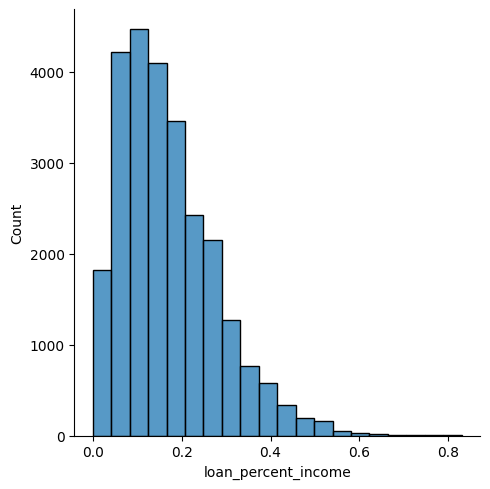

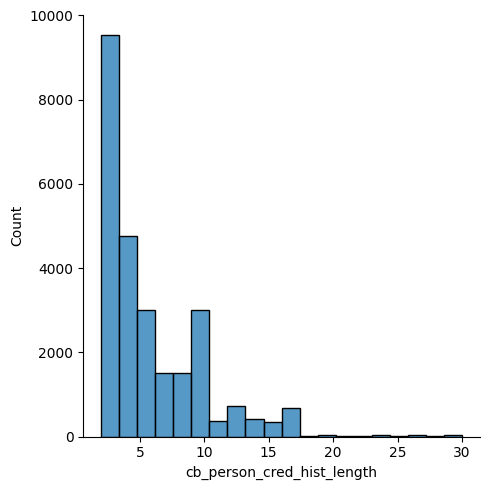

In [13]:
for col_name, val in X_train_.items():
    sns.displot(data=X_train_, x=col_name, bins = 20)

Jika kita lihat dari diagram yang terbuat, distribusinya skewed. Maka ketika melakukan proses imputasi di preprocessing, kita akan menggunakan median imputation 

<Axes: xlabel='loan_status', ylabel='count'>

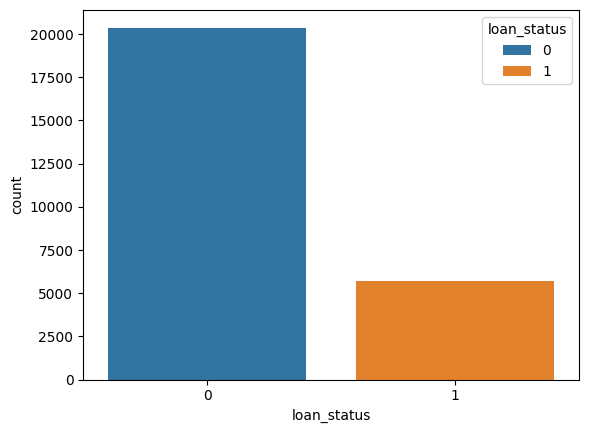

In [14]:
sns.countplot(data=pd.DataFrame(y_train), x="loan_status", hue="loan_status")

Terlihat dari diagram, bahwa distribusinya tidak merata untuk loan_status.